In [552]:
#!pip install pyspark
%pip install scikit-learn
%pip install sklearn
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
#from sklearn.metrics import confusion_matrix
#from pyspark.sql.functions import *
#from pyspark.sql import SparkSession
#from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, VectorSlicer
#from pyspark.ml.functions import vector_to_array
#from pyspark.sql.functions import col, to_date, year, to_timestamp, month, lit
#from pyspark.sql.functions import countDistinct 
#from pyspark.sql.functions import when


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [553]:
#Location of train and test files
data_loc = "C:/Users/Y9FHP3726/Desktop/DiplomaThesis/Datasets/preprocessed_data_cust_code_date_formatted.csv"

# read the CSV file into a Pandas DataFrame
dataset = pd.read_csv(data_loc)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(dataset.head(10))


C:\Users\Y9FHP3726\AppData\Local\Temp\ipykernel_10432\3728520146.py:5: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(data_loc)


   fetch_date  cust_code country sex age new_cust cust_seniority indrel  \
0  2015-01-28  1375586.0       1   1  35        0              6      1   
1  2015-01-28  1050614.0       1   0  23        0             35      1   
2  2015-01-28  1050617.0       1   1  23        0             35      1   
3  2015-01-28  1050623.0       1   1  23        0             35      1   
4  2015-01-28  1050624.0       1   1  65        0             35      1   
5  2015-01-28  1050625.0       1   0  23        0             35      1   
6  2015-01-28  1050626.0       1   0  23        0             35      1   
7  2015-01-28  1050610.0       1   0  24        0             35      1   
8  2015-01-28  1050609.0       1   1  22        0             35      1   
9  2015-01-28  1050582.0       1   0  28        0             35      1   

  residence_index foreigner_index deceased activity_index     income  \
0               1               0        0              1    87218.1   
1               1             

In [554]:
print(len(dataset))

6137217


In [555]:
dataset = dataset.dropna()

In [556]:
print(len(dataset))

6137115


# **apo edw kai katw koitazw diafora aspects gia kathe column tou dataset**

In [557]:
'''
#INFO GIA XWRES
country_df=dataset.select('country').filter(col("country") != lit("ES"))
distinct_value_count = country_df.select(countDistinct("country")).first()[0]
print(distinct_value_count)'''

'\n#INFO GIA XWRES\ncountry_df=dataset.select(\'country\').filter(col("country") != lit("ES"))\ndistinct_value_count = country_df.select(countDistinct("country")).first()[0]\nprint(distinct_value_count)'

In [558]:
'''
#INFO GIA EMP_INDEX
emp_index_df=dataset.select('emp_index')
distinct_value_count = emp_index_df.select(countDistinct("emp_index")).first()[0]
print(distinct_value_count)
emp_index_df=dataset.select('emp_index').distinct().filter(col("emp_index")!= lit('N'))
emp_index_df.show()
'''


'\n#INFO GIA EMP_INDEX\nemp_index_df=dataset.select(\'emp_index\')\ndistinct_value_count = emp_index_df.select(countDistinct("emp_index")).first()[0]\nprint(distinct_value_count)\nemp_index_df=dataset.select(\'emp_index\').distinct().filter(col("emp_index")!= lit(\'N\'))\nemp_index_df.show()\n'

In [559]:
'''#INFO GIA sex
sex_df=dataset.select('sex')
distinct_value_count = sex_df.select(countDistinct("sex")).first()[0]
print(distinct_value_count)
#sex_df=dataset.select('sex').distinct().filter(col("emp_index")!= lit('N'))
#sex_df.show()'''

'#INFO GIA sex\nsex_df=dataset.select(\'sex\')\ndistinct_value_count = sex_df.select(countDistinct("sex")).first()[0]\nprint(distinct_value_count)\n#sex_df=dataset.select(\'sex\').distinct().filter(col("emp_index")!= lit(\'N\'))\n#sex_df.show()'

In [560]:
'''#INFO GIA new_cust
new_cust_df=dataset.select('new_cust')
distinct_value_count = new_cust_df.select(countDistinct("new_cust")).first()[0]
print(distinct_value_count)
new_cust_df=dataset.select('new_cust').distinct()
new_cust_df.show()'''

'#INFO GIA new_cust\nnew_cust_df=dataset.select(\'new_cust\')\ndistinct_value_count = new_cust_df.select(countDistinct("new_cust")).first()[0]\nprint(distinct_value_count)\nnew_cust_df=dataset.select(\'new_cust\').distinct()\nnew_cust_df.show()'

In [561]:
'''#INFO GIA cust_seniority
cust_seniority_df=dataset.select('cust_seniority')
distinct_value_count = cust_seniority_df.select(countDistinct("cust_seniority")).first()[0]
print(distinct_value_count)
cust_seniority_df=dataset.select('cust_seniority').distinct()
cust_seniority_df.show()'''

'#INFO GIA cust_seniority\ncust_seniority_df=dataset.select(\'cust_seniority\')\ndistinct_value_count = cust_seniority_df.select(countDistinct("cust_seniority")).first()[0]\nprint(distinct_value_count)\ncust_seniority_df=dataset.select(\'cust_seniority\').distinct()\ncust_seniority_df.show()'

In [562]:
'''#INFO GIA indrel
indrel=dataset.select('indrel')
distinct_value_count = indrel.select(countDistinct("indrel")).first()[0]
print(distinct_value_count)
indrel=dataset.select('indrel').distinct()
indrel.show()'''

'#INFO GIA indrel\nindrel=dataset.select(\'indrel\')\ndistinct_value_count = indrel.select(countDistinct("indrel")).first()[0]\nprint(distinct_value_count)\nindrel=dataset.select(\'indrel\').distinct()\nindrel.show()'

In [563]:
'''#INFO GIA last_date_as_primary
last_date_as_primary=dataset.select('last_date_as_primary')
distinct_value_count = last_date_as_primary.select(countDistinct("last_date_as_primary")).first()[0]
print(distinct_value_count)
last_date_as_primary=dataset.select('last_date_as_primary').distinct()
last_date_as_primary.show()'''

'#INFO GIA last_date_as_primary\nlast_date_as_primary=dataset.select(\'last_date_as_primary\')\ndistinct_value_count = last_date_as_primary.select(countDistinct("last_date_as_primary")).first()[0]\nprint(distinct_value_count)\nlast_date_as_primary=dataset.select(\'last_date_as_primary\').distinct()\nlast_date_as_primary.show()'

In [564]:
'''#INFO GIA cust_type
cust_type=dataset.select('cust_type')
distinct_value_count = cust_type.select(countDistinct("cust_type")).first()[0]
print(distinct_value_count)
cust_type=dataset.select('cust_type').distinct()
cust_type.show() '''

'#INFO GIA cust_type\ncust_type=dataset.select(\'cust_type\')\ndistinct_value_count = cust_type.select(countDistinct("cust_type")).first()[0]\nprint(distinct_value_count)\ncust_type=dataset.select(\'cust_type\').distinct()\ncust_type.show() '

In [565]:
'''#INFO GIA cust_rel
cust_rel=dataset.select('cust_rel')
distinct_value_count = cust_rel.select(countDistinct("cust_rel")).first()[0]
print(distinct_value_count)
cust_rel=dataset.select('cust_rel').distinct()
cust_rel.show() '''

'#INFO GIA cust_rel\ncust_rel=dataset.select(\'cust_rel\')\ndistinct_value_count = cust_rel.select(countDistinct("cust_rel")).first()[0]\nprint(distinct_value_count)\ncust_rel=dataset.select(\'cust_rel\').distinct()\ncust_rel.show() '

In [566]:
''' #INFO GIA residence_index
residence_index=dataset.select('residence_index')
distinct_value_count = residence_index.select(countDistinct("residence_index")).first()[0]
print(distinct_value_count)
residence_index=dataset.select('residence_index').distinct()
residence_index.show() '''

' #INFO GIA residence_index\nresidence_index=dataset.select(\'residence_index\')\ndistinct_value_count = residence_index.select(countDistinct("residence_index")).first()[0]\nprint(distinct_value_count)\nresidence_index=dataset.select(\'residence_index\').distinct()\nresidence_index.show() '

In [567]:
 '''#INFO GIA foreigner_index
foreigner_index=dataset.select('foreigner_index')
distinct_value_count = foreigner_index.select(countDistinct("foreigner_index")).first()[0]
print(distinct_value_count)
foreigner_index=dataset.select('foreigner_index').distinct()
foreigner_index.show() '''

'#INFO GIA foreigner_index\nforeigner_index=dataset.select(\'foreigner_index\')\ndistinct_value_count = foreigner_index.select(countDistinct("foreigner_index")).first()[0]\nprint(distinct_value_count)\nforeigner_index=dataset.select(\'foreigner_index\').distinct()\nforeigner_index.show() '

In [568]:
 '''#INFO GIA spouse_index
spouse_index=dataset.select('spouse_index')
distinct_value_count = spouse_index.select(countDistinct("spouse_index")).first()[0]
print(distinct_value_count)
spouse_index=dataset.select('spouse_index').distinct()
spouse_index.show() '''

'#INFO GIA spouse_index\nspouse_index=dataset.select(\'spouse_index\')\ndistinct_value_count = spouse_index.select(countDistinct("spouse_index")).first()[0]\nprint(distinct_value_count)\nspouse_index=dataset.select(\'spouse_index\').distinct()\nspouse_index.show() '

In [569]:
 '''#INFO GIA joining_channel
joining_channel=dataset.select('joining_channel')
distinct_value_count = joining_channel.select(countDistinct("joining_channel")).first()[0]
print(distinct_value_count)
joining_channel=dataset.select('joining_channel').distinct()
joining_channel.show() '''

'#INFO GIA joining_channel\njoining_channel=dataset.select(\'joining_channel\')\ndistinct_value_count = joining_channel.select(countDistinct("joining_channel")).first()[0]\nprint(distinct_value_count)\njoining_channel=dataset.select(\'joining_channel\').distinct()\njoining_channel.show() '

In [570]:
 '''#INFO GIA deceased
deceased=dataset.select('deceased')
distinct_value_count = deceased.select(countDistinct("deceased")).first()[0]
print(distinct_value_count)
deceased=dataset.select('deceased').distinct()
deceased.show() '''

'#INFO GIA deceased\ndeceased=dataset.select(\'deceased\')\ndistinct_value_count = deceased.select(countDistinct("deceased")).first()[0]\nprint(distinct_value_count)\ndeceased=dataset.select(\'deceased\').distinct()\ndeceased.show() '

In [571]:
 '''#INFO GIA address_type
address_type=dataset.select('address_type')
distinct_value_count = address_type.select(countDistinct("address_type")).first()[0]
print(distinct_value_count)
address_type=dataset.select('address_type').distinct()
address_type.show() '''

'#INFO GIA address_type\naddress_type=dataset.select(\'address_type\')\ndistinct_value_count = address_type.select(countDistinct("address_type")).first()[0]\nprint(distinct_value_count)\naddress_type=dataset.select(\'address_type\').distinct()\naddress_type.show() '

In [572]:
 '''#INFO GIA prov_code
prov_code=dataset.select('prov_code')
distinct_value_count = prov_code.select(countDistinct("prov_code")).first()[0]
print(distinct_value_count)
prov_code=dataset.select('prov_code').distinct()
prov_code.show() '''

'#INFO GIA prov_code\nprov_code=dataset.select(\'prov_code\')\ndistinct_value_count = prov_code.select(countDistinct("prov_code")).first()[0]\nprint(distinct_value_count)\nprov_code=dataset.select(\'prov_code\').distinct()\nprov_code.show() '

In [573]:
 '''#INFO GIA activity_index
activity_index=dataset.select('activity_index')
distinct_value_count = activity_index.select(countDistinct("activity_index")).first()[0]
print(distinct_value_count)
activity_index=dataset.select('activity_index').distinct()
activity_index.show() '''

'#INFO GIA activity_index\nactivity_index=dataset.select(\'activity_index\')\ndistinct_value_count = activity_index.select(countDistinct("activity_index")).first()[0]\nprint(distinct_value_count)\nactivity_index=dataset.select(\'activity_index\').distinct()\nactivity_index.show() '

# **apo edw kai katw ksekinaw na ftiaxnw to dataset gia to peirama me to proion pou tha eisagei o xrhsths**


In [574]:
product = input("What product should I use to test the model? \n  or in other words, for which product should I make predict whether or not the users will have by the end of the next month? \n please type one of the following: \n savings_account, guarentees, current_account, derivative_account, payroll_account, \n junior_account, mas_account, perticular_account, perticular_plus, st_deposit, \n mt_deposits, lt_deposits, e_account, funds, mortgage, \n pension, loan, tax, credit_card, securities, \n home_account, payroll, pension2, direct_debit ")
print(type(product))
'''columns_to_drop=[
'savings_account',
 'guarentees', 
 'current_account',
 'derivative_account',
 'payroll_account',
 'junior_account', 
 'mas_account',
 'perticular_account',
 'perticular_plus',
 'st_deposit', 
 'mt_deposits',
 'lt_deposits',
 'e_account',
 'funds',
 'mortgage', 
 'pension', 
 'loan',
 'tax', 
 'credit_card',
 'securities',
 'home_account',
 'payroll',
 'pension2', 
 'direct_debit']
columns_to_drop.remove(product)'''


#ftiaxnw data
#data=dataset.drop(columns=columns_to_drop) 
data=dataset
print('The  columns in data are\n',list(data.columns))
print('The no of columns in data are\n',len(data.columns))

<class 'str'>
The  columns in data are
 ['fetch_date', 'cust_code', 'country', 'sex', 'age', 'new_cust', 'cust_seniority', 'indrel', 'residence_index', 'foreigner_index', 'deceased', 'activity_index', 'income', 'savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account', 'junior_account', 'mas_account', 'perticular_account', 'perticular_plus', 'st_deposit', 'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage', 'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit', 'emp_index_D', 'emp_index_B', 'emp_index_C', 'emp_index_A', 'emp_index_E', 'cust_type_1', 'cust_type_3', 'cust_type_2', 'cust_rel_I', 'cust_rel_A', 'cust_rel_P', 'segmentation_2', 'segmentation_3', 'segmentation_1']
The no of columns in data are
 51


# **APO AUTO TO CELL kai katw TREKSE GIA NA ALLAZEIS TIS PARAMETERS TOU ALGORITHM**

In [575]:
print(dataset.dtypes)

fetch_date            object
cust_code             object
country               object
sex                   object
age                   object
new_cust              object
cust_seniority        object
indrel                object
residence_index       object
foreigner_index       object
deceased              object
activity_index        object
income                object
savings_account       object
guarentees            object
current_account       object
derivative_account    object
payroll_account       object
junior_account        object
mas_account           object
perticular_account    object
perticular_plus       object
st_deposit            object
mt_deposits           object
lt_deposits           object
e_account             object
funds                 object
mortgage              object
pension               object
loan                  object
tax                   object
credit_card           object
securities            object
home_account          object
payroll       

In [576]:
#==============================================================================================================
#epilegw ws train ta rows tou data me fetch_date=2015-01-28
#epilegw ws test ta rows tou data me fetch_date=2015-02-28



train = data[data['fetch_date'] == "2015-01-28"]

test = data[data['fetch_date'] == "2015-02-28"]

print('train is:')
print(train.head(5))
print('============================================================================================================')


print('test is:')
print(test.head(5))
print('============================================================================================================')

train is:
   fetch_date  cust_code country sex age new_cust cust_seniority indrel  \
0  2015-01-28  1375586.0       1   1  35        0              6      1   
1  2015-01-28  1050614.0       1   0  23        0             35      1   
2  2015-01-28  1050617.0       1   1  23        0             35      1   
3  2015-01-28  1050623.0       1   1  23        0             35      1   
4  2015-01-28  1050624.0       1   1  65        0             35      1   

  residence_index foreigner_index deceased activity_index     income  \
0               1               0        0              1    87218.1   
1               1               0        0              1        0.0   
2               1               0        0              1  113316.66   
3               1               0        0              1  113538.81   
4               1               0        0              1   61605.09   

  savings_account guarentees current_account derivative_account  \
0               0          0           

# **sto apo katw cell kanw inner join panw sto cust code ta 2 dfs opou to ena exei fetch_date=2015-01-28 kai to allo exei fetch_date=2015-02-28 prokeimenou na sumperilavw sto peirama pelates pou uparxoun kai tous 2 mhnes kai ara exei aksia h provlepsi**

In [577]:
merged_df = pd.merge(train, test, on='cust_code', suffixes=('_train', '_test'))
print(merged_df.head(1))
print('============================================================================================================')
print(len(merged_df))

  fetch_date_train  cust_code country_train sex_train age_train  \
0       2015-01-28  1375586.0             1         1        35   

  new_cust_train cust_seniority_train indrel_train residence_index_train  \
0              0                    6            1                     1   

  foreigner_index_train deceased_train activity_index_train income_train  \
0                     0              0                    1      87218.1   

  savings_account_train guarentees_train current_account_train  \
0                     0                0                     1   

  derivative_account_train payroll_account_train junior_account_train  \
0                        0                     0                    0   

  mas_account_train perticular_account_train perticular_plus_train  \
0                 0                        0                     0   

  st_deposit_train mt_deposits_train lt_deposits_train e_account_train  \
0                0                 0                 0          

In [578]:
#ftiaxnw train
train= merged_df[['fetch_date_train',   
'cust_code', 
'country_train',
'sex_train',
'age_train', 
'new_cust_train',
'cust_seniority_train',
'indrel_train',
'residence_index_train',        
'foreigner_index_train',
'deceased_train',                       
'activity_index_train',
'income_train',
'savings_account_train',
'guarentees_train', 
'current_account_train',
'derivative_account_train',
'payroll_account_train',
'junior_account_train', 
'mas_account_train',
'perticular_account_train',
'perticular_plus_train',
'st_deposit_train', 
'mt_deposits_train',
'lt_deposits_train',
'e_account_train',
'funds_train',
'mortgage_train', 
'pension_train', 
'loan_train',
'tax_train', 
'credit_card_train',
'securities_train',
'home_account_train',
'payroll_train',
'pension2_train', 
'direct_debit_train',
'emp_index_D_train',
'emp_index_B_train',
'emp_index_C_train',
'emp_index_A_train', 
'emp_index_E_train', 
'cust_type_1_train', 
'cust_type_3_train', 
'cust_type_2_train',
'cust_rel_I_train',
'cust_rel_A_train',
'cust_rel_P_train', 
'segmentation_2_train', 
'segmentation_3_train', 
'segmentation_1_train'
]]
# rename all columns at once
train.columns = ['fetch_date',   
'cust_code', 
'country',
'sex',
'age', 
'new_cust',
'cust_seniority',
'indrel',
'residence_index',        
'foreigner_index',
'deceased',                       
'activity_index',
'income',
'savings_account',
'guarentees', 
'current_account',
'derivative_account',
'payroll_account',
'junior_account', 
'mas_account',
'perticular_account',
'perticular_plus',
'st_deposit', 
'mt_deposits',
'lt_deposits',
'e_account',
'funds',
'mortgage', 
'pension', 
'loan',
'tax', 
'credit_card',
'securities',
'home_account',
'payroll',
'pension2', 
'direct_debit',
'emp_index_D',
'emp_index_B',
'emp_index_C',
'emp_index_A', 
'emp_index_E', 
'cust_type_1', 
'cust_type_3', 
'cust_type_2',
'cust_rel_I',
'cust_rel_A',
'cust_rel_P', 
'segmentation_2', 
'segmentation_3', 
'segmentation_1']
print(train.head(2))
print('======================================================================================================')
print(len(train))

   fetch_date  cust_code country sex age new_cust cust_seniority indrel  \
0  2015-01-28  1375586.0       1   1  35        0              6      1   
1  2015-01-28  1050614.0       1   0  23        0             35      1   

  residence_index foreigner_index deceased activity_index   income  \
0               1               0        0              1  87218.1   
1               1               0        0              1      0.0   

  savings_account guarentees current_account derivative_account  \
0               0          0               1                  0   
1               0          0               1                  0   

  payroll_account junior_account mas_account perticular_account  \
0               0              0           0                  0   
1               0              0           0                  0   

  perticular_plus st_deposit mt_deposits lt_deposits e_account funds mortgage  \
0               0          0           0           0         0     0        0 

In [579]:
#ftiaxnw test
test= merged_df[['fetch_date_test',   
'cust_code', 
'country_test',
'sex_test',
'age_test', 
'new_cust_test',
'cust_seniority_test',
'indrel_test',
'residence_index_test',        
'foreigner_index_test',
'deceased_test',                       
'activity_index_test',
'income_test',
'savings_account_test',
'guarentees_test', 
'current_account_test',
'derivative_account_test',
'payroll_account_test',
'junior_account_test', 
'mas_account_test',
'perticular_account_test',
'perticular_plus_test',
'st_deposit_test', 
'mt_deposits_test',
'lt_deposits_test',
'e_account_test',
'funds_test',
'mortgage_test', 
'pension_test', 
'loan_test',
'tax_test', 
'credit_card_test',
'securities_test',
'home_account_test',
'payroll_test',
'pension2_test', 
'direct_debit_test',
'emp_index_D_test',
'emp_index_B_test',
'emp_index_C_test',
'emp_index_A_test', 
'emp_index_E_test', 
'cust_type_1_test', 
'cust_type_3_test', 
'cust_type_2_test',
'cust_rel_I_test',
'cust_rel_A_test',
'cust_rel_P_test', 
'segmentation_2_test', 
'segmentation_3_test', 
'segmentation_1_test']]
# rename all columns at once
test.columns = ['fetch_date',   
'cust_code', 
'country',
'sex',
'age', 
'new_cust',
'cust_seniority',
'indrel',
'residence_index',        
'foreigner_index',
'deceased',                       
'activity_index',
'income',
'savings_account',
'guarentees', 
'current_account',
'derivative_account',
'payroll_account',
'junior_account', 
'mas_account',
'perticular_account',
'perticular_plus',
'st_deposit', 
'mt_deposits',
'lt_deposits',
'e_account',
'funds',
'mortgage', 
'pension', 
'loan',
'tax', 
'credit_card',
'securities',
'home_account',
'payroll',
'pension2', 
'direct_debit',
'emp_index_D',
'emp_index_B',
'emp_index_C',
'emp_index_A', 
'emp_index_E', 
'cust_type_1', 
'cust_type_3', 
'cust_type_2',
'cust_rel_I',
'cust_rel_A',
'cust_rel_P', 
'segmentation_2', 
'segmentation_3', 
'segmentation_1']
print(test.head(2))
print('======================================================================================================')
print(len(test))

   fetch_date  cust_code country sex age new_cust cust_seniority indrel  \
0  2015-02-28  1375586.0       1   1  35        0              6      1   
1  2015-02-28  1050614.0       1   0  23        0             35      1   

  residence_index foreigner_index deceased activity_index   income  \
0               1               0        0              1  87218.1   
1               1               0        0              1      0.0   

  savings_account guarentees current_account derivative_account  \
0               0          0               1                  0   
1               0          0               1                  0   

  payroll_account junior_account mas_account perticular_account  \
0               0              0           0                  0   
1               0              0           0                  0   

  perticular_plus st_deposit mt_deposits lt_deposits e_account funds mortgage  \
0               0          0           0           0         0     0        0 

In [580]:
#now delete fetch_date, cust_code column from train and test dataset
train=train.drop(columns=['fetch_date','cust_code']) 
test=test.drop(columns=['fetch_date','cust_code']) 

print('AFTER DELETION OF fetch_date and cust_code COLUMNS:')
print('train is:')
print(train.head(5))
print('============================================================================================================')


print('test is:')
print(test.head(5))
print('============================================================================================================')


#!!!I NOW CAST EVERY COLUMN TO BE INT IN ORDER TO RUN MY LOGISTIC REGRESSION!!!
train = train.astype(int)
print('AFTER casting every column to int:')
print('train is:')
print(train.head(5))
print('============================================================================================================')


test = test.astype(int)
print('test is:')
print(test.head(5))

AFTER DELETION OF fetch_date and cust_code COLUMNS:
train is:
  country sex age new_cust cust_seniority indrel residence_index  \
0       1   1  35        0              6      1               1   
1       1   0  23        0             35      1               1   
2       1   1  23        0             35      1               1   
3       1   1  23        0             35      1               1   
4       1   1  65        0             35      1               1   

  foreigner_index deceased activity_index     income savings_account  \
0               0        0              1    87218.1               0   
1               0        0              1        0.0               0   
2               0        0              1  113316.66               0   
3               0        0              1  113538.81               0   
4               0        0              1   61605.09               0   

  guarentees current_account derivative_account payroll_account  \
0          0               1 

In [581]:
print('The number of users in train data that own ',product, ' as a product  are:')
a = train[train[product] == 1]
print(len(a))
print('out of: ')
print(len(train))

The number of users in train data that own  credit_card  as a product  are:
31067
out of: 
312913


In [582]:
print('The number of users in test data that own ',product, ' as a product  are:')
b = test[test[product] == 1]
print(len(b))
print('out of: ')
print(len(test))

The number of users in test data that own  credit_card  as a product  are:
30026
out of: 
312913


# **An xreiazetai na kanw balance to TRAIN dataset gia kapoio proion tote trexw ton kwdika sto epomeno cell alliws ton afhnw commented**

In [583]:
# for balance of train dataset

num_zero_rows =  (train[product] == 0).sum()
num_non_zero_rows = (train[product] != 0).sum()
num_rows_to_keep = min(num_zero_rows,num_non_zero_rows)

df_zero = train[train[product] ==0].sample(n=num_rows_to_keep, random_state=42)
df_non_zero = train[train[product] != 0].sample(n=num_rows_to_keep, random_state=42)
train_balanced = pd.concat([df_zero, df_non_zero], ignore_index=True)
train_balanced = train_balanced.sample(frac=1, random_state=42) # set random_state for reproducibility


print('The number of users in balanced_train data that own ',product, ' as a product  are:')
a_bal=train_balanced[train_balanced[product] == 1]
print(len(a_bal))
print('out of: ')
print(len(train_balanced))
print('============================================================================')
print(train_balanced.head(5))
train1=train_balanced

The number of users in balanced_train data that own  credit_card  as a product  are:
31067
out of: 
62134
       country  sex  age  new_cust  cust_seniority  indrel  residence_index  \
41472        1    0   65         0             235       1                1   
25096        1    0   50         0              16       1                1   
44771        1    1   34         0              39       1                1   
29183        1    1   29         0              44       1                1   
36753        1    1   38         0              54       1                1   

       foreigner_index  deceased  activity_index  income  savings_account  \
41472                0         0               1  263600                0   
25096                0         0               1       0                0   
44771                0         0               1  217622                0   
29183                0         0               1   59635                0   
36753                0         0  

# **TEST OF DECISION TREE**

In [584]:
from sklearn.tree import DecisionTreeClassifier
features_list=['country',
'sex',
'age', 
'new_cust',
'cust_seniority',
'indrel',
'residence_index',        
'foreigner_index',
'deceased',                       
'activity_index',
'income',
'savings_account',
'guarentees', 
'current_account',
'derivative_account',
'payroll_account',
'junior_account', 
'mas_account',
'perticular_account',
'perticular_plus',
'st_deposit', 
'mt_deposits',
'lt_deposits',
'e_account',
'funds',
'mortgage', 
'pension', 
'loan',
'tax', 
'credit_card',
'securities',
'home_account',
'payroll',
'pension2', 
'direct_debit',
'emp_index_D',
'emp_index_B',
'emp_index_C',
'emp_index_A', 
'emp_index_E', 
'cust_type_1', 
'cust_type_3', 
'cust_type_2',
'cust_rel_I',
'cust_rel_A',
'cust_rel_P', 
'segmentation_2', 
'segmentation_3', 
'segmentation_1']
features_list.remove(product)
#features_list=['country','sex','age','new_cust','cust_seniority','indrel','residence_index','foreigner_index','deceased','activity_index','income','emp_index_D','emp_index_B','emp_index_C','emp_index_A','emp_index_E','cust_type_1','cust_type_3','cust_type_2','cust_rel_I','cust_rel_A','cust_rel_P','segmentation_2','segmentation_3','segmentation_1']
# split the data into features (X) and target (y)
features_train = train[features_list]
target_train = train[product]

# create a LogisticRegression model
model = DecisionTreeClassifier(---------------)

# fit the model to the data
model.fit(features_train, target_train)



LogisticRegression(max_iter=50)

In [585]:
# make predictions on new data

features_test=test.drop(columns=product) 
target_test=test[product]

# predict class labels for the testing set
predictions = model.predict(features_test)

y_pred_prob = model.predict_proba(features_test)

# print the predicted values
print('The predictions are:')
print(predictions)


The predictions are:
[0 0 0 ... 0 0 0]


# **SKLEARN METRICS**

In [586]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score


# compute accuracy score
accuracy = accuracy_score(target_test, predictions)
print("Accuracy: {:.4f}".format(accuracy))

# compute precision score
precision = precision_score(target_test, predictions)
print("Precision: {:.4f}".format(precision))

# compute recall score
recall = recall_score(target_test, predictions)
print("Recall: {:.4f}".format(recall))

# compute AUC score
auc = roc_auc_score(target_test, y_pred_prob[:, 1])
print("ROC AUC on test data: {:.4f}".format(auc))


Accuracy: 0.8936
Precision: 0.0030
Recall: 0.0003
ROC AUC on test data: 0.5311


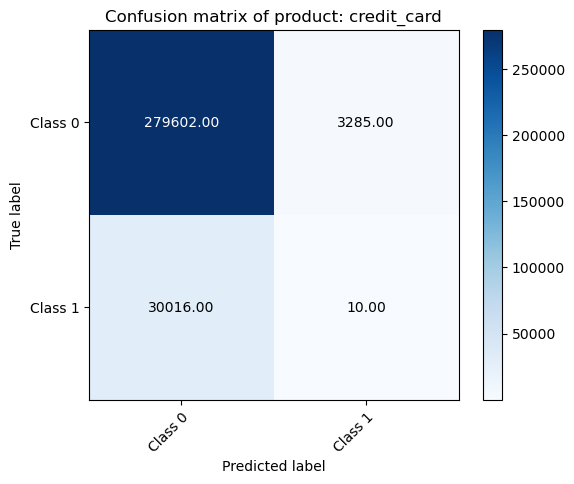

In [587]:
#CONFUSION MATRIX
from sklearn.metrics import  confusion_matrix
# Generate some example data
#y_true = np.array([0, 1, 0, 1, 1, 0, 0, 1])
#y_pred = np.array([1, 1, 0, 1, 0, 0, 1, 0])

#y_true = df.select(col(product)).flatMap(lambda x: x).collect()
#y_pred = df.select(col('prediction')).flatMap(lambda x: x).collect()
# Convert the list to a NumPy array
#y_true = np.array(y_true)
#y_pred = np.array(y_pred)

y_true = target_test
y_pred = predictions





# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Set the ticks and tick labels
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Class 0', 'Class 1'],
       yticklabels=['Class 0', 'Class 1'],
       title='Confusion matrix of product: '+product,
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
fmt = '.2f'  # Format for displaying the numbers in the cells
thresh = cm.max() / 2.  # Threshold for coloring the cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Add a grid to the plot
ax.grid(False)

# Display the plot
plt.show()